### Building a Binary SVM classifier

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [34]:
class SVM_classifier():


  # initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  
  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    self.m, self.n = X.shape

    # initiating the weight value and bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    loss_history = []


    for i in range(self.no_of_iterations):
      loss = self.calculate_loss()
      loss_history.append(loss)
      self.update_weights()

    self.plot_loss_history(loss_history)


  def update_weights(self):

    y_label = np.where(self.Y <= 0, -1, 1)



    for index, x_i in enumerate(self.X):

      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw

      self.b = self.b - self.learning_rate * db



  def predict(self, X):

    output = np.dot(X, self.w) - self.b
    
    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat  
  
  def calculate_loss(self):
    y_label = np.where(self.Y <= 0, -1, 1)
    hinge_loss = 1 - y_label * (np.dot(self.X, self.w) - self.b)
    hinge_loss[hinge_loss < 0] = 0
    loss = 0.5 * np.dot(self.w, self.w) + self.lambda_parameter * np.mean(hinge_loss)
    return loss


  def plot_loss_history(self, loss_history):
    plt.plot(range(1, self.no_of_iterations + 1), loss_history)
    plt.xlabel("No of iterations")
    plt.ylabel("Loss")
    plt.show()



### Data Preprocessing

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- 0 indicates non-diabetic
- 1 indicates diabetic

In [8]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']


In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X)

StandardScaler()

In [12]:
X = scaler.transform(X)

In [13]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


- Splitting the dataset

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [36]:
model = SVM_classifier(learning_rate = 0.001, no_of_iterations = 1000, lambda_parameter = 0.01)

### Training the model and Loss vs iterations

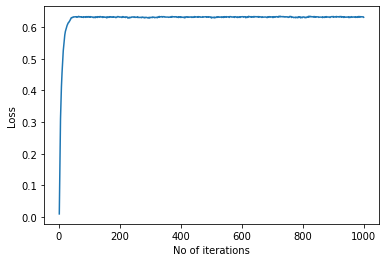

In [37]:
model.fit(X_train, y_train)

In [38]:
model_1 = SVM_classifier(learning_rate = 0.001, no_of_iterations = 1000, lambda_parameter = 0.1)

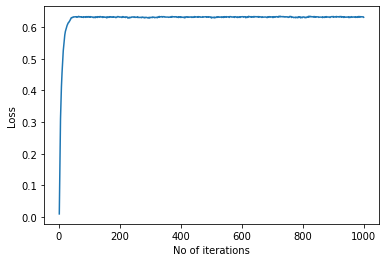

In [39]:
modle_1 = model.fit(X_train, y_train)

- Increasing the number of iterations

In [40]:
model_2 = SVM_classifier(learning_rate = 0.001, no_of_iterations = 10000, lambda_parameter = 0.01)

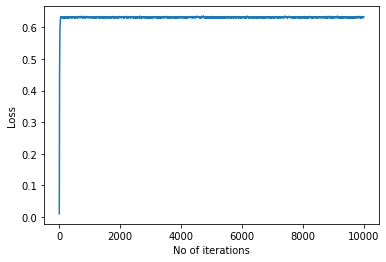

In [41]:
model_2.fit(X_train, y_train)

In [17]:
y_pred = model.predict(X_train)

- Accuracy on the Train Dataset

In [18]:
score = accuracy_score(y_train, y_pred)

In [19]:
print(score)

0.7768729641693811


- Accuracy on the Test Dataset

In [20]:
y_pred = model.predict(X_test)

In [21]:
score = accuracy_score(y_test, y_pred)

In [22]:
print(score)

0.7532467532467533


In [23]:
import seaborn as sns

- Metrics/Results

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       109
           1       0.61      0.44      0.51        45

    accuracy                           0.75       154
   macro avg       0.70      0.66      0.67       154
weighted avg       0.74      0.75      0.74       154



In [88]:
confusion_matrix(y_test, y_pred)

array([[96, 13],
       [25, 20]], dtype=int64)

In [25]:
lambda_parameters = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [26]:
accuracy_scores = []
for i in lambda_parameters:

  model = SVM_classifier(learning_rate = 0.001, no_of_iterations = 1000, lambda_parameter = i)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  score = accuracy_score(y_test, y_pred)

  accuracy_scores.append(score)

In [27]:
print(accuracy_scores)

[0.7662337662337663, 0.7662337662337663, 0.7532467532467533, 0.7727272727272727, 0.7077922077922078, 0.7077922077922078, 0.7077922077922078]


Text(0, 0.5, 'accuracy_scores')

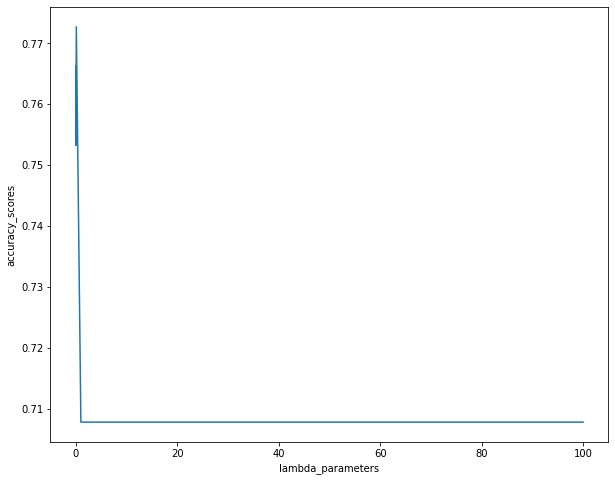

In [30]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = lambda_parameters, y = accuracy_scores)
plt.xlabel('lambda_parameters')
plt.ylabel('accuracy_scores')

### Creating a Multi class SVM

In [42]:
class BinarySVM:

    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0

        for i in range(self.no_of_iterations):
            self.update_weights(X, Y)

    def update_weights(self, X, Y):
        hinge_loss = 1 - Y * (np.dot(X, self.w) - self.b)
        hinge_loss[hinge_loss < 0] = 0
        loss = 0.5 * np.dot(self.w, self.w) + self.lambda_parameter * np.mean(hinge_loss)

        dw = -np.dot(Y * X.T, hinge_loss > 0) + self.lambda_parameter * self.w
        db = -np.sum(Y * (hinge_loss > 0))

        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def decision_function(self, X):
        return np.dot(X, self.w) - self.b


In [43]:
class MultiClassSVM:

    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
        self.classifiers = []  # Store binary classifiers
        self.num_classes = 0

    def fit(self, X, Y):
        self.num_classes = len(np.unique(Y))  # Number of unique classes
        self.classifiers = []

        for i in range(self.num_classes):
            binary_classifier = BinarySVM(self.learning_rate, self.no_of_iterations, self.lambda_parameter)
            binary_y = np.where(Y == i, 1, -1)  # Convert to binary labels
            binary_classifier.fit(X, binary_y)
            self.classifiers.append(binary_classifier)

    def predict(self, X):
        scores = np.zeros((X.shape[0], self.num_classes))
        print(scores)

        for i in range(self.num_classes):
            scores[:, i] = self.classifiers[i].decision_function(X)

        return np.argmax(scores, axis=1)

In [44]:
iris = pd.read_csv('iris.csv')

In [47]:
y = iris['Species']

In [48]:
y = LabelEncoder().fit_transform(y)

In [49]:
X = iris.drop('Species', axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [51]:
multi_svm = MultiClassSVM(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

In [52]:
multi_svm.fit(X_train, y_train)

In [61]:
y_pred = multi_svm.predict(X_train)

In [58]:
score = accuracy_score(y_train, y_pred)

In [59]:
print(score)

0.8


In [65]:
y_pred = multi_svm.predict(X_test)

- Test dataset accuracy

In [66]:
score = accuracy_score(y_test, y_pred)

In [67]:
print(score)

0.7


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.80      0.33      0.47        12
           2       0.50      1.00      0.67         8

    accuracy                           0.70        30
   macro avg       0.77      0.74      0.69        30
weighted avg       0.79      0.70      0.68        30



In [70]:
multi_svm.predict(np.array([[6.0, 2.2, 5.0, 1.5]]))

AttributeError: 'list' object has no attribute 'shape'